In [ ]:
#install packages: Word cloud is used for visualising frequent words 
#in a text where the size of the words represents their frequency

!pip install wordcloud

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.


In [3]:
#install packages: spaCy used to build information extraction or natural language understanding systems

!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# import libraries

import re
import string
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [8]:
#importing the dataset

df = pd.read_csv('/fake_job_postings.csv')

In [9]:
#checking the first 5 columns of the dataset

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0.0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0.0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0.0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


In [10]:
#checking the number of rows and columns of the dataset

df.shape

(17448, 18)

In [11]:
#checking the total of columns and their values, both null and true

df.isnull().sum()

job_id                     0
title                      0
location                 337
department             11253
salary_range           14667
company_profile         3007
description                0
requirements            2600
benefits                7023
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3344
required_experience     6837
required_education      7848
industry                4739
function                6263
fraudulent                 1
dtype: int64

In [12]:
#delete unnecessary columns

columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del df[col]

In [13]:
#fill NaN spaces with blank

df.fillna(' ', inplace=True)

In [14]:
#checking the first 5 columns of the dataset after filling NaN values with blank

df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0.0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0.0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0.0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


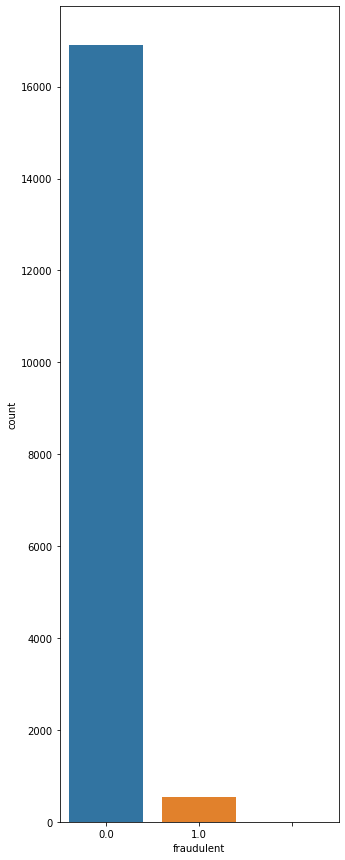

In [15]:
#compare the number of fraudulent and non fraudulent job postings
#using seaborn to visualize

plt.figure(figsize=(5,15))
sns.countplot(x='fraudulent', data=df)
plt.show()

In [16]:
#understanding the number of fraudulent and non fraudulent job posting in our dataset

df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0.0    16901
1.0      546
           1
Name: fraudulent, dtype: int64

In [17]:
#Visualize job postings by countries
#create an new column named country in order to make the visualization broad and clear as the location column provided has country,state and city listed

def split(location):
    l = location.split(',')
    return l[0]
df['country'] = df.location.apply(split)

In [18]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0.0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0.0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0.0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0,US


In [19]:
#visualizing the number of job postings for the top 10 countries in the dataset
#creating a dictionary of key value pairs for visuaization

countr = dict(df.country.value_counts()[:10])
del countr[' ']
countr

{'AU': 187,
 'CA': 449,
 'DE': 381,
 'GB': 2356,
 'GR': 934,
 'IN': 271,
 'NZ': 331,
 'PH': 131,
 'US': 10334}

Text(0.5, 0, 'Countries')

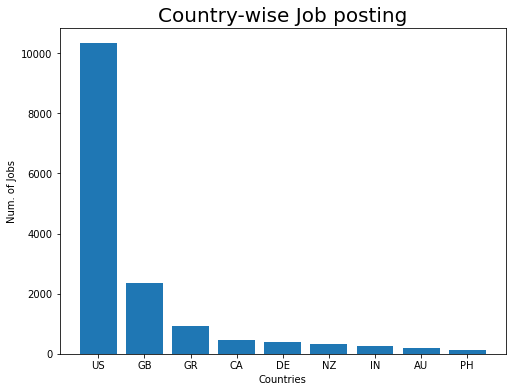

In [20]:
#visualizing the country with the highest number of job posting

plt.figure(figsize=(8,6))
plt.title('Country-wise Job posting', size=20)
plt.bar(countr.keys(),countr.values())
plt.ylabel('Num. of Jobs', size=10)
plt.xlabel('Countries', size=10)

In [21]:
#visualizing the required education level and number of job posting for each level

edu = dict(df.required_education.value_counts()[:7])
del edu[' ']
edu

{'Associate Degree': 273,
 "Bachelor's Degree": 5104,
 'Certification': 166,
 'High School or equivalent': 2013,
 "Master's Degree": 410,
 'Unspecified': 1353}

Text(0.5, 0, 'Education')

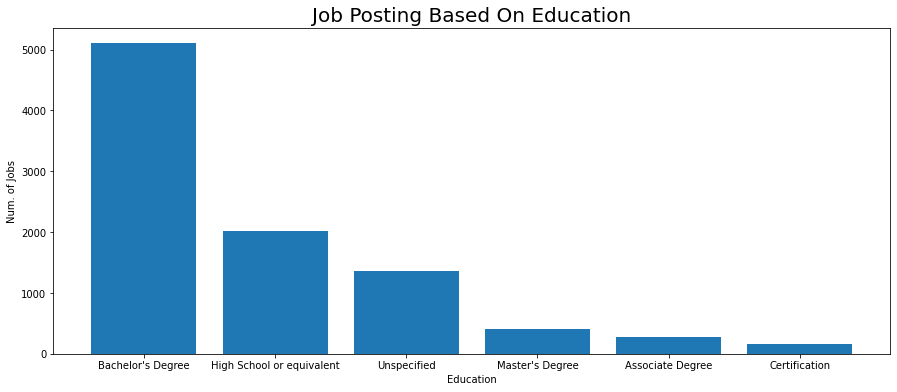

In [22]:
#visualizing the top educational requirement

plt.figure(figsize=(15,6))
plt.title('Job Posting Based On Education', size=20)
plt.bar(edu.keys(),edu.values())
plt.ylabel('Num. of Jobs', size=10)
plt.xlabel('Education', size=10)

In [23]:
#checking for the commonly used job titles when the job title is not fraudulent

print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        61
Name: title, dtype: int64


In [24]:
#checking for the commonly used job titles when the job title is fraudulent

print(df[df.fraudulent==1].title.value_counts()[:10])

Customer Service Representative                                         12
Administrative Assistant                                                11
Cruise Staff Wanted *URGENT*                                            10
Home Based Payroll Typist/Data Entry Clerks Positions Available          9
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily      7
Payroll Clerk                                                            6
Payroll Data Coordinator Positions - Earn $100-$200 Daily                6
Agency Sales Managers $150-$175,000/yr                                   5
Account Sales Managers $80-$130,000/yr                                   5
Executive Chef                                                           5
Name: title, dtype: int64


In [25]:
#checking for the industry that has the highest number of fake job postings.

print(df[df.fraudulent==0].industry.value_counts()[:10])

                                       4597
Information Technology and Services    1689
Computer Software                      1355
Internet                               1055
Education Management                    822
Marketing and Advertising               779
Financial Services                      741
Hospital & Health Care                  445
Consumer Services                       333
Telecommunications                      315
Name: industry, dtype: int64


Text(0.5, 0, 'Industry')

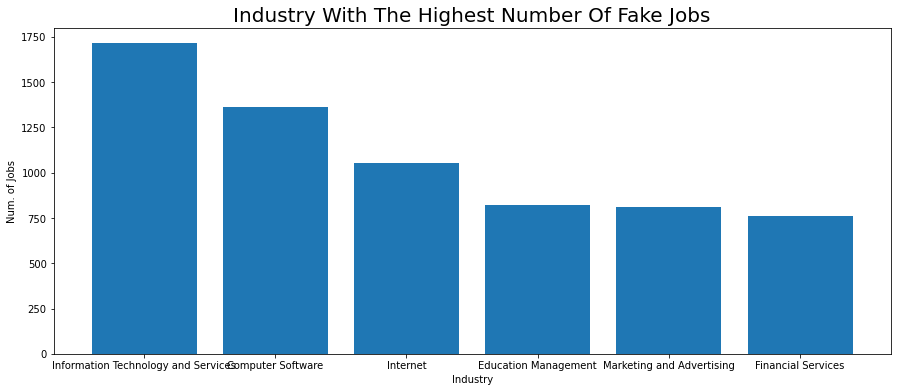

In [29]:
#visualizing the industry that has the highest number of fake job postings.

plt.figure(figsize=(15,6))
plt.title('Industry With The Highest Number Of Fake Jobs', size=20)
plt.bar(ind.keys(),ind.values())
plt.ylabel('Num. of Jobs', size=10)
plt.xlabel('Industry', size=10)

In [30]:
#combine all the columns in the dataset into 1 single column as text and all the rest of the columns will be deleted
#all text will be combined into 1 column and the 2nd column will state if the job was fraudulent or not

df['text']=df['title']+' '+df['location']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']



In [31]:
df.head()

,fraudulent,text
0,0.0,"Marketing Intern US, NY, New York We're Food52..."
1,0.0,"Customer Service - Cloud Video Production NZ, ..."
2,0.0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0.0,"Account Executive - Washington DC US, DC, Wash..."
4,0.0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [32]:
#creating wordclouds for fraudulent and non fraudulent jobs

fraudjobs_text = df[df.fraudulent==1].text
realjobs_text = df[df.fraudulent==0].text

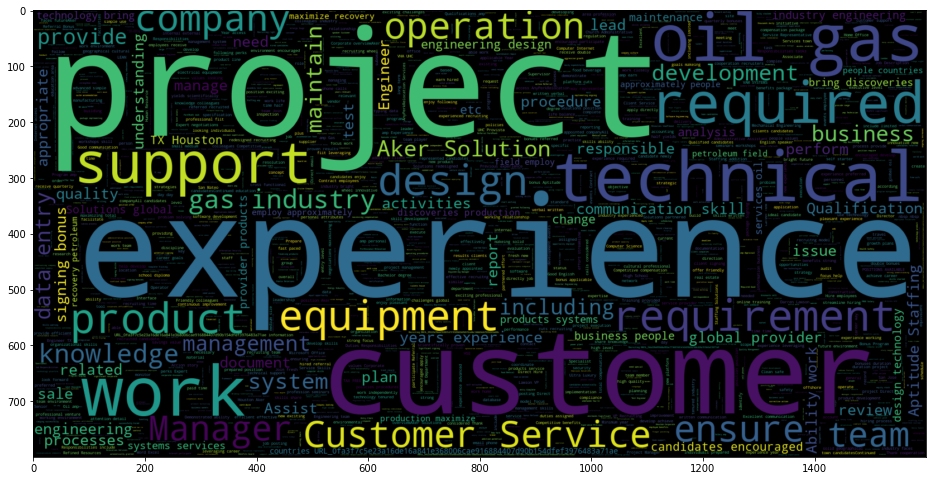

In [33]:
#fraudulent jobs word cloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

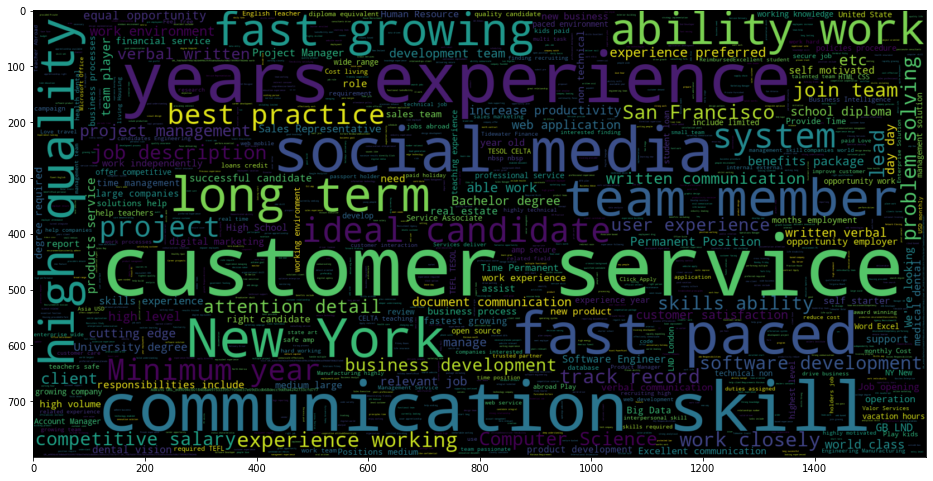

In [34]:
#real jobs wordcloud
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [ ]:
#install packages to work with English words in natural language processing 

!pip install spacy && python -m spacy download en

In [36]:
#preprocess the data
#creating a list of punctuation marks
punctuations = string.punctuation

#creating a list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#load English tokenizer, parswe, NER and word vectors
parcer = English()

#creating our tokenizer function
def spacy_tokenizer(sentence):
    #creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    #lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    #removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    #return a preprocessed list of tokens
    return mytokens

#custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):

        #cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}    

#basic function to clean the text
def clean_text(text):
    #removing spaces and converting text into lowercase
    return text.strip().lower()



In [37]:
#cleaning the text of the dataset

df['text'] = df['text'].apply(clean_text)

In [38]:
#using Tfidfvectorizer: a count vectorizer that gives equal advantage to all the words and 
#and converts the words to column for each document and shows how important the word is, it is used in transforming text into vectors.

cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
df.drop(['text'], axis=1, inplace=True)
main_df = pd.concat([df1,df], axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.040688,0.000000,0.042086,0.036310,0.000000,0.752524,0.000000,0.078079,0.000000,...,0.00000,0.000000,0.184841,0.050791,0.067564,0.000000,0.000000,0.000000,0.000000,0.0
1,0.021900,0.093705,0.035321,0.024231,0.041811,0.029655,0.491817,0.056548,0.059939,0.052413,...,0.00000,0.077788,0.165546,0.043864,0.116700,0.098827,0.000000,0.204734,0.130406,0.0
2,0.000000,0.000000,0.176396,0.000000,0.041761,0.088859,0.397666,0.112961,0.000000,0.000000,...,0.00000,0.062157,0.307078,0.058416,0.000000,0.000000,0.000000,0.094381,0.074429,0.0
3,0.023256,0.000000,0.018754,0.000000,0.000000,0.094474,0.696367,0.000000,0.031825,0.037106,...,0.02308,0.049563,0.075342,0.046581,0.000000,0.104947,0.019717,0.050172,0.059349,0.0
4,0.000000,0.000000,0.067825,0.000000,0.040144,0.028472,0.607121,0.081439,0.115098,0.000000,...,0.00000,0.000000,0.158945,0.028077,0.037349,0.000000,0.035654,0.030242,0.107319,0.0


In [40]:
#testing and trimming the dataset
Y = main_df.iloc[:,-1]
X = main_df.iloc[:,:-1]

#splitting dataset into 70% for trimming and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

#Train-test shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12213, 100)
(12213,)
(5235, 100)
(5235,)


In [43]:
print(X_test)

        ability     about       all      also       amp        an       and  \
1258   0.000000  0.000000  0.026081  0.000000  0.555712  0.000000  0.207517   
13884  0.037432  0.000000  0.000000  0.000000  0.000000  0.025343  0.420307   
13526  0.000000  0.072085  0.000000  0.074561  0.000000  0.045625  0.360324   
11430  0.088068  0.000000  0.000000  0.000000  0.084068  0.000000  0.423807   
14814  0.082888  0.000000  0.000000  0.045855  0.000000  0.028059  0.243759   
...         ...       ...       ...       ...       ...       ...       ...   
5795   0.026904  0.000000  0.021696  0.000000  0.000000  0.036430  0.489105   
4635   0.068227  0.000000  0.027509  0.000000  0.000000  0.069289  0.510730   
11092  0.000000  0.054375  0.122977  0.000000  0.145573  0.068832  0.489244   
3159   0.000000  0.056397  0.000000  0.000000  0.301971  0.142783  0.563817   
8708   0.034640  0.000000  0.000000  0.038327  0.000000  0.070359  0.500094   

            are        as        at  ...      well 